In [12]:
import os
import sys
sys.path.append(os.pardir)
from dataset import ptb

# import numpy as np
import matplotlib.pyplot as plt
from neuralflow.model import *
from neuralflow.function_class import *
from neuralflow.function import *
from neuralflow.data import *
from neuralflow.optimizer import *
from neuralflow.trainer import *
from neuralflow import config
config.GPU = True
from neuralflow.gpu import *
from neuralflow.utils import *

In [2]:
# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

말뭉치 크기: 1000, 어휘 수: 418


In [3]:
model = Model(
    EmbeddingLayer(vocab_size, 100),
    RNNLayer(100, 100),
    DenseLayer(100, vocab_size)
)

In [4]:
print(model)

0. EmbeddingLayer1 : EmbeddingLayer (418, 100) 
1. RNNLayer1 : RNNLayer (100, 100) 
2. DenseLayer1 : DenseLayer (100, 418) 



In [5]:
critic = CrossEntropyLoss()
optim = SGDOptimizer(lr = 0.1)
# optim = Adam()

In [6]:
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
max_epoch = 100
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []


/home/augustin/project/DL-Implement/RNN/../simpleDL/model.py:260: RuntimeWarning: overflow encountered in cast
  result = np.empty((batch_size, n_timestep, self.hidden_size)).astype(np.float32)
/home/augustin/project/DL-Implement/RNN/../simpleDL/model.py:631: RuntimeWarning: overflow encountered in cast
  hidden_state = np.empty((batch_size, n_timestep, hidden_size)).astype(np.float32)


| 에폭 1 | 퍼플렉서티 498.72
| 에폭 2 | 퍼플렉서티 357.44
| 에폭 3 | 퍼플렉서티 252.85
| 에폭 4 | 퍼플렉서티 230.88
| 에폭 5 | 퍼플렉서티 212.85
| 에폭 6 | 퍼플렉서티 197.04
| 에폭 7 | 퍼플렉서티 193.13
| 에폭 8 | 퍼플렉서티 178.38
| 에폭 9 | 퍼플렉서티 171.30
| 에폭 10 | 퍼플렉서티 166.75
| 에폭 11 | 퍼플렉서티 156.83
| 에폭 12 | 퍼플렉서티 151.90
| 에폭 13 | 퍼플렉서티 143.72
| 에폭 14 | 퍼플렉서티 140.17
| 에폭 15 | 퍼플렉서티 130.86
| 에폭 16 | 퍼플렉서티 122.58
| 에폭 17 | 퍼플렉서티 116.31
| 에폭 18 | 퍼플렉서티 113.39
| 에폭 19 | 퍼플렉서티 108.34
| 에폭 20 | 퍼플렉서티 101.41
| 에폭 21 | 퍼플렉서티 96.62
| 에폭 22 | 퍼플렉서티 91.38
| 에폭 23 | 퍼플렉서티 84.74
| 에폭 24 | 퍼플렉서티 78.41
| 에폭 25 | 퍼플렉서티 75.62
| 에폭 26 | 퍼플렉서티 72.44
| 에폭 27 | 퍼플렉서티 65.70
| 에폭 28 | 퍼플렉서티 63.05
| 에폭 29 | 퍼플렉서티 58.31
| 에폭 30 | 퍼플렉서티 54.68
| 에폭 31 | 퍼플렉서티 53.80
| 에폭 32 | 퍼플렉서티 47.33
| 에폭 33 | 퍼플렉서티 45.80
| 에폭 34 | 퍼플렉서티 42.49
| 에폭 35 | 퍼플렉서티 41.44
| 에폭 36 | 퍼플렉서티 38.59
| 에폭 37 | 퍼플렉서티 35.49
| 에폭 38 | 퍼플렉서티 34.17
| 에폭 39 | 퍼플렉서티 30.83
| 에폭 40 | 퍼플렉서티 27.80
| 에폭 41 | 퍼플렉서티 26.85
| 에폭 42 | 퍼플렉서티 25.58
| 에폭 43 | 퍼플렉서티 23.67
| 에폭 44 | 퍼플렉서티 21.49
| 에폭 45 | 퍼플렉서티 20.39

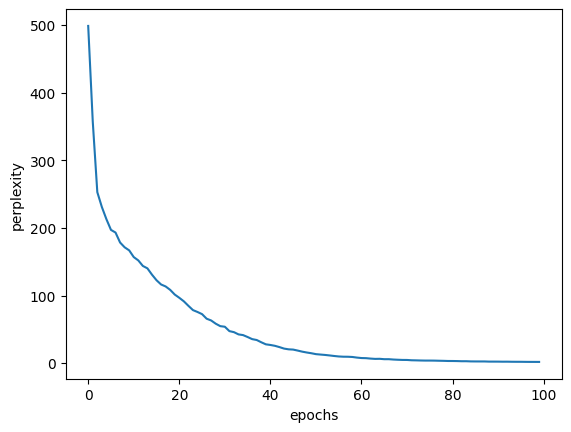

In [7]:
jump = (len(corpus) - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        pred = model(batch_x)
        loss = critic(pred, batch_t)
        model.backward(critic)
        optim.update(model)
        total_loss += loss
        loss_count += 1
    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    # ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

In [ ]:
model = Model(
    EmbeddingLayer(vocab_size, 100, initialize="Xavier"),
    RNNLayer(100, 100, initialize="Xavier"),
    DenseLayer(100, vocab_size, initialize="Xavier")
)

In [ ]:
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
max_epoch = 100
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []


| 에폭 1 | 퍼플렉서티 378.33
| 에폭 2 | 퍼플렉서티 250.43
| 에폭 3 | 퍼플렉서티 221.44
| 에폭 4 | 퍼플렉서티 214.91
| 에폭 5 | 퍼플렉서티 204.64
| 에폭 6 | 퍼플렉서티 200.78
| 에폭 7 | 퍼플렉서티 197.12
| 에폭 8 | 퍼플렉서티 194.51
| 에폭 9 | 퍼플렉서티 188.40
| 에폭 10 | 퍼플렉서티 188.89
| 에폭 11 | 퍼플렉서티 184.68
| 에폭 12 | 퍼플렉서티 187.65
| 에폭 13 | 퍼플렉서티 184.22
| 에폭 14 | 퍼플렉서티 184.98
| 에폭 15 | 퍼플렉서티 182.43
| 에폭 16 | 퍼플렉서티 178.10
| 에폭 17 | 퍼플렉서티 174.07
| 에폭 18 | 퍼플렉서티 170.55
| 에폭 19 | 퍼플렉서티 169.37
| 에폭 20 | 퍼플렉서티 169.19
| 에폭 21 | 퍼플렉서티 167.96
| 에폭 22 | 퍼플렉서티 160.53
| 에폭 23 | 퍼플렉서티 156.22
| 에폭 24 | 퍼플렉서티 158.22
| 에폭 25 | 퍼플렉서티 150.10
| 에폭 26 | 퍼플렉서티 149.96
| 에폭 27 | 퍼플렉서티 143.02
| 에폭 28 | 퍼플렉서티 139.82
| 에폭 29 | 퍼플렉서티 135.71
| 에폭 30 | 퍼플렉서티 129.09
| 에폭 31 | 퍼플렉서티 129.40
| 에폭 32 | 퍼플렉서티 122.76
| 에폭 33 | 퍼플렉서티 120.85
| 에폭 34 | 퍼플렉서티 112.87
| 에폭 35 | 퍼플렉서티 112.83
| 에폭 36 | 퍼플렉서티 105.62
| 에폭 37 | 퍼플렉서티 100.94
| 에폭 38 | 퍼플렉서티 97.71
| 에폭 39 | 퍼플렉서티 93.57
| 에폭 40 | 퍼플렉서티 89.47
| 에폭 41 | 퍼플렉서티 87.35
| 에폭 42 | 퍼플렉서티 82.49
| 에폭 43 | 퍼플렉서티 77.99
| 에폭 44 | 퍼플렉서티 74.46
| 에폭

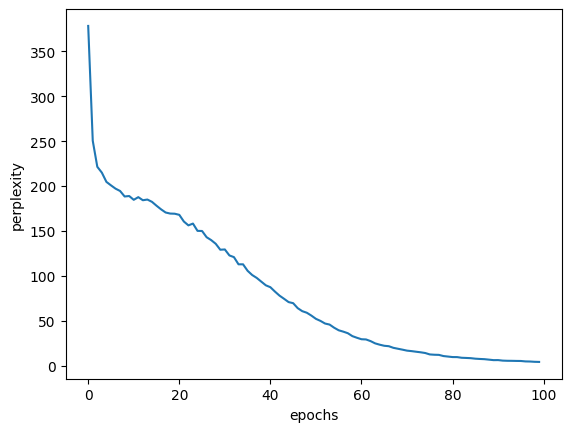

In [ ]:
jump = (len(corpus) - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        pred = model(batch_x)
        loss = critic(pred, batch_t)
        model._backward(critic)
        optim.update(model)
        total_loss += loss
        loss_count += 1
    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()